## Pricing European Option

### Using Binomial tree

In [52]:
#Initial input

S=1
K=1
r=0.05
T=1 # year, time to maturity
v=0.02

BSM_call=0.0488 # the BSM call value for above values
BSM_put=3.90914708412321e-05

In the discrete BSM world:

$S_{j+1}=S_j exp\left[(r-\frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t}X_j\right]$

For $u: X_j=1, d: X_j=-1$

Ref: Mark Joshi, Eqn 7.14

In [67]:
def tree_call(N,S,K,r,T,v):
    dt=T/N #step size
    u=np.exp((r- v**2 /2)*dt+v*np.sqrt(dt))
    d=np.exp((r- v**2 /2)*dt-v*np.sqrt(dt))
    p= (np.exp(r*dt)-d)/(u-d)# probability of up, 1=e^(-rt)(pu+(1-p)d)
    #print(p)
    S_tree=np.zeros([N+1,N+1]) # use just the upper triangle of this square # total nodes N(N+1)/2
    # rows: the node at that step, col: the step
    for i in range(N+1): #step
        for j in range(i+1): #nodes # at each step- have n+1 nodes, as ud=du
            S_tree[j,i]=S*u**(i-j)*d**(j) # from top to down power of u decreases, d increases, sum of powers=step/col
    
    option_tree=np.zeros([N+1,N+1])
    option_tree[:,N]=np.maximum(np.zeros(N+1),S_tree[:,N]-K) # payoff at maturity
    # now construct rest of the option tree using the option values at last step
    for i in reversed(range(N)): #steps # reversed as fill tree backwards
        for j in range(i+1):
            option_tree[j,i]=(np.exp(-r*dt))*(option_tree[j,i+1]*p+option_tree[j+1,i+1]*(1-p))
            # here, i+1 as next step, j - the up value, j+1 the down value (imagine upper triangle of matrix)
    return option_tree[0,0]


def tree_put(N,S,K,r,T,v):
    dt=T/N #step size
    u=np.exp(v*np.sqrt(dt))
    d=1/u
    p= (np.exp(r*dt)-d)/(u-d)# probability of up, 1=e^(-rt)(pu+(1-p)d)
    #print(p)
    S_tree=np.zeros([N+1,N+1]) # use just the upper triangle of this square
    # rows: the node at that step, col: the step
    for i in range(N+1): #step
        for j in range(i+1): #nodes # at each step- have n+1 nodes, as ud=du
            S_tree[j,i]=S*u**(i-j)*d**(j) # from top to down power of u decreases, d increases, sum of powers=step/col
    
    option_tree=np.zeros([N+1,N+1])
    option_tree[:,N]=np.maximum(np.zeros(N+1),-S_tree[:,N]+K) # payoff at maturity
    # now construct rest of the option tree using the option values at last step
    for i in reversed(range(N)): #steps # reversed as fill tree backwards
        for j in range(i+1):
            option_tree[j,i]=(np.exp(-r*dt))*(option_tree[j,i+1]*p+option_tree[j+1,i+1]*(1-p))
            # here, i+1 as next step, j - the up value, j+1 the down value (imagine upper triangle of matrix)
    return option_tree[0,0]
            

In [66]:
N=365
oc=tree_call(N,S,K,r,T,v)
op=tree_put(N,S,K,r,T,v)
display(oc,op)

0.5000000000477973


0.04880931997737296

3.786670771187805e-05

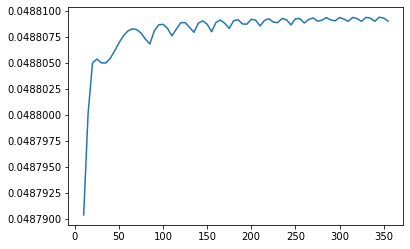

In [64]:
# convergence of price wrt steps
import matplotlib.pyplot as plt
N=np.arange(10,360,5)
oc=[]
for n in N:
    oc.append(tree_call(n,S,K,r,T,v))

plt.plot(N,oc)

Notice the zig zag shape, this arises because of odd or even nodes in final layer.  